<a href="https://colab.research.google.com/github/Durgeshwagh1975/Soft-Computing-Programs/blob/main/To_implement_SOFM_for_character_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To implement SOFM for character recognition

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 60000
Test samples: 10000


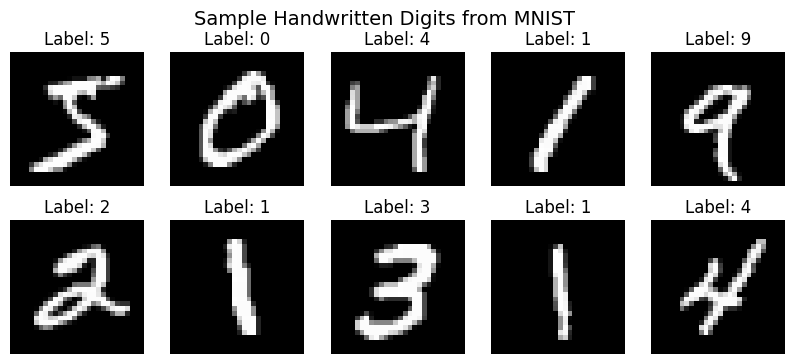

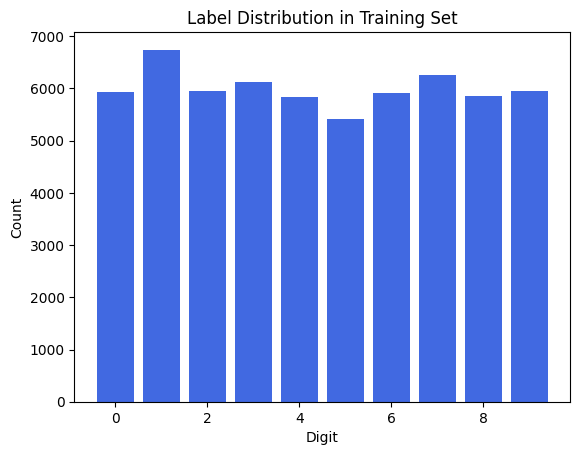

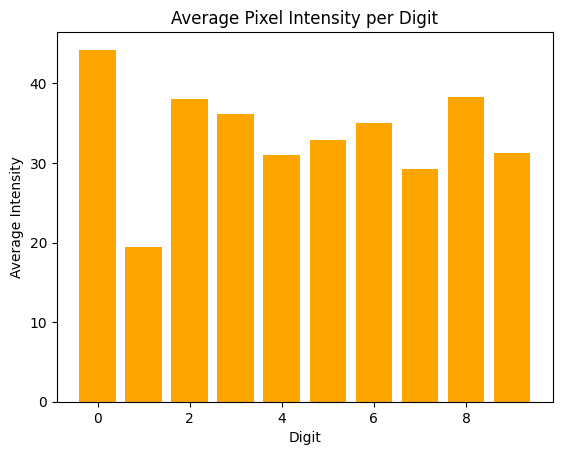

Standard deviation of intensities: 6.298731255689624

Training Support Vector Machine (SVM)...


In [ ]:
# HANDWRITTEN CHARACTER RECOGNITION using SVM & KNN
# Dataset: MNIST (from Keras / Kaggle)
# =========================================================

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.datasets import mnist
import seaborn as sns

# 1️⃣ Load MNIST Dataset
print("Loading MNIST dataset...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# 2️⃣ Exploratory Data Analysis (EDA)
# Display some sample digits
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.suptitle("Sample Handwritten Digits from MNIST", fontsize=14)
plt.show()

# Count distribution of labels
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, color='royalblue')
plt.title("Label Distribution in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

# Compute average pixel intensity per digit
avg_intensity = [np.mean(X_train[y_train == i]) for i in range(10)]
plt.bar(range(10), avg_intensity, color='orange')
plt.title("Average Pixel Intensity per Digit")
plt.xlabel("Digit")
plt.ylabel("Average Intensity")
plt.show()

print("Standard deviation of intensities:", np.std(avg_intensity))

# 3️⃣ Data Preprocessing
# Flatten images (28x28 -> 784)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize data
X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

# For faster testing, we can use smaller subsets (optional)
# X_train_flat, _, y_train, _ = train_test_split(X_train_flat, y_train, train_size=10000, stratify=y_train)
# X_test_flat, _, y_test, _ = train_test_split(X_test_flat, y_test, train_size=2000, stratify=y_test)

# 4️⃣ Train SVM Classifier
print("\nTraining Support Vector Machine (SVM)...")
svm_model = SVC(kernel='rbf', gamma=0.05)
svm_model.fit(X_train_flat, y_train)
y_pred_svm = svm_model.predict(X_test_flat)
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_acc * 100:.2f}%")

# 5️⃣ Train KNN Classifier
print("\nTraining K-Nearest Neighbors (KNN)...")
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_flat, y_train)

y_pred_knn = knn_model.predict(X_test_flat)
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_acc * 100:.2f}%")

# 6️⃣ Compare Models
print("\nModel Performance Comparison:")
print(f"SVM Accuracy: {svm_acc * 100:.2f}%")
print(f"KNN Accuracy: {knn_acc * 100:.2f}%")

# 7️⃣ Confusion Matrix for the Best Model
best_model = "SVM" if svm_acc > knn_acc else "KNN"
y_pred_best = y_pred_svm if best_model == "SVM" else y_pred_knn

print(f"\nBest Model: {best_model}")
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for {best_model}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 8️⃣ Classification Report
print(f"\nClassification Report for {best_model}:")
print(classification_report(y_test, y_pred_best))
